In [ ]:
#boilerplate code for using classes to interact with SQL databases
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base #convert python classes into SQL tables
from sqlalchemy.ext.automap import automap_base #convert python classes into SQL tables
from sqlalchemy import Column, Integer, String, Float, text
import pymysql
from sqlalchemy.orm import Session
pymysql.install_as_MySQLdb()
from sqlalchemy import func
from sqlalchemy import distinct
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
engine=create_engine("sqlite:///../hawaii.sqlite")

session=Session(bind=engine)

#Declare a Base useing automap_base()

Base = automap_base()

Base.prepare(engine, reflect=True)

In [ ]:
#make sure that measurements and stations are in there

Base.classes.keys()

In [17]:
#use the first rows of the two tables to make sure they look like they should
Measurements = Base.classes.measurements
first_row = session.query(Measurements).first()
first_row.__dict__

Stations = Base.classes.stations
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x109c6f240>,
 'date': datetime.date(2010, 1, 1),
 'id': 0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x109c6f400>,
 'elevation': 3.0,
 'id': 0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [61]:
### Precipitation Analysis

#* Design a query to retrieve the last 12 months of precipitation data.
#* Select only the `date` and `prcp` values.

p12m = session.query(Measurements).filter(Measurements.date>='2016-08-23').with_entities(Measurements.date, Measurements.prcp)

#* Load the query results into a Pandas DataFrame and set the index to the date column.
df = pd.read_sql(p12m.statement, p12m.session.bind).set_index('date').reset_index().reset_index()

df.head()

,index,date,prcp
0,0,2016-08-23,0.00
1,1,2016-08-24,0.08
2,2,2016-08-25,0.08
3,3,2016-08-26,0.00
4,4,2016-08-27,0.00


In [93]:
#take average precipitation values for each date

prcp_by_date=pd.DataFrame(df.groupby(df['date'])['prcp'].mean()).reset_index()

prcp_by_date.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


(array([ 736238.,  736299.,  736361.,  736420.,  736481.,  736542.]),
 <a list of 6 Text xticklabel objects>)

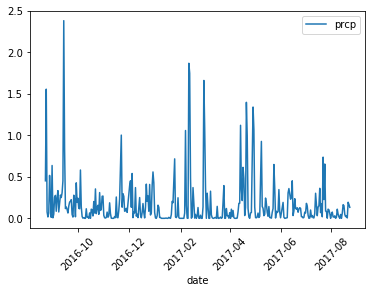

In [94]:
# Plot the results using the DataFrame `plot` method.

prcp_by_date.plot(kind='line',x='date',y='prcp')

plt.xticks(rotation=45)

plt.show()

In [95]:
#* Use Pandas to print the summary statistics for the precipitation data.

print("PRECIPITATION STATS: \n------------")
print(f"Mean: {round(np.mean(df['prcp']),2)}")
print(f"Median: {round(np.median(df['prcp']),2)}")
print(f"Min: {round(np.min(df['prcp']),2)}")
print(f"Max: {round(np.max(df['prcp']),2)}")
print(f"Standard Deviation: {round(np.std(df['prcp']),2)}")


PRECIPITATION STATS: 
------------
Mean: 0.18
Median: 0.02
Min: 0.0
Max: 6.7
Standard Deviation: 0.46


In [119]:
#STATION ANALYSIS

#* Design a query to calculate the total number of stations.

total_stations = session.query(Measurements.station).distinct().count()
print(f"Total stations: {total_stations}")

#* Design a query to find the most active stations.

result = session.query(Measurements.station, func.count(Measurements.prcp)).group_by(Measurements.station).order_by(func.count(Measurements.prcp).desc()).all()

#  * List the stations and observation counts in descending order

print('\nObservation counts by station:\n')

for row in result:
    print(f"{row[0]}: {row[1]}")


#  * Which station has the highest number of observations?

#ANSWER: USC00519281

Total stations: 9

Observation counts by station:

USC00519281: 2772
USC00513117: 2696
USC00519397: 2685
USC00519523: 2572
USC00516128: 2484
USC00514830: 1937
USC00511918: 1932
USC00517948: 683
USC00518838: 342


In [126]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.

p12m_temp = session.query(Measurements).filter(Measurements.date>='2016-08-01',Measurements.date<'2017-08-01',Measurements.station=='USC00519281').with_entities(Measurements.date, Measurements.tobs)

df = pd.read_sql(p12m_temp.statement, p12m_temp.session.bind).set_index('date').reset_index().reset_index()

df.head(10)
df.tail(10)

,index,date,tobs
0,0,2016-08-01,76
1,1,2016-08-02,76
2,2,2016-08-03,77
3,3,2016-08-04,77
4,4,2016-08-05,81
5,5,2016-08-06,78
6,6,2016-08-07,78
7,7,2016-08-08,81
8,8,2016-08-09,81
9,9,2016-08-10,82


,index,date,tobs
355,355,2017-07-22,77
356,356,2017-07-23,82
357,357,2017-07-24,75
358,358,2017-07-25,77
359,359,2017-07-26,75
360,360,2017-07-27,76
361,361,2017-07-28,81
362,362,2017-07-29,82
363,363,2017-07-30,81
364,364,2017-07-31,76


In [127]:
#  * Plot the results as a histogram with `bins=12`.

(array([  5.,   7.,   7.,  12.,  27.,  41.,  40.,  58.,  69.,  54.,  33.,
         12.]), array([ 59.        ,  60.91666667,  62.83333333,  64.75      ,
         66.66666667,  68.58333333,  70.5       ,  72.41666667,
         74.33333333,  76.25      ,  78.16666667,  80.08333333,  82.        ]), <a list of 12 Patch objects>)

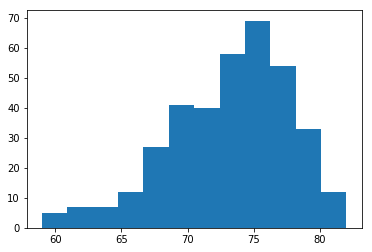

In [136]:
plt.hist(df['tobs'],12)
plt.show()


In [204]:
#Temperature Analysis
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

#Plot the min, avg, and max temperature from your previous query as a bar chart.

#Use the average temperature as the bar height.

#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


def calc_temps(start_date,end_date):
    import datetime
    start_dateobject=datetime.datetime.strptime(start_date, '%Y-%m-%d')
    start_newdate_object=datetime.datetime.date(start_dateobject-datetime.timedelta(days=365))
    start_newdate_string=start_newdate_object.strftime('%Y-%m-%d')
    
    end_dateobject=datetime.datetime.strptime(end_date, '%Y-%m-%d')
    end_newdate_object=datetime.datetime.date(end_dateobject-datetime.timedelta(days=365))
    end_newdate_string=end_newdate_object.strftime('%Y-%m-%d')
    
    data_subset=df[(df['date']>=start_newdate_object) & (df['date']<=end_newdate_object)]
    
    #calculate the minimum temperature
    min=df.min()
    
    #TODO: actually make the function do what it's supposed to do lol
    
    return data_subset

In [205]:
calc_temps('2017-09-01','2017-10-01')

,index,date,tobs
31,31,2016-09-01,80
32,32,2016-09-02,80
33,33,2016-09-03,78
34,34,2016-09-04,78
35,35,2016-09-05,78
36,36,2016-09-06,73
37,37,2016-09-07,74
38,38,2016-09-08,80
39,39,2016-09-09,79
40,40,2016-09-10,77
